In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn as sns
from tqdm import tqdm

## Part 1: process the CLICS data and derive a word-to-concept ratio for each language

In [2]:
df = pd.read_csv('raw_corpus_data/clics/df_all_raw.csv')

/Users/dharakyu/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Here's an example entry:

In [3]:
df.iloc[0]

dataset_ID                                  abrahammonpa
Form_ID                           BugunBichom-100_gold-1
Form                                                 san
clics_form                                           san
gloss_in_source                                     gold
Concepticon_ID                                      1369
Concepticon_Gloss                                   GOLD
Ontological_Category                        Person/Thing
Semantic_Field              Basic actions and technology
variety                                     Bugun Bichom
Glottocode                                      bich1234
ISO639P3code                                         NaN
Macroarea                                            NaN
Family                                      Sino-Tibetan
Latitude                                             NaN
Longitude                                            NaN
MRC_WORD                                            GOLD
AGE_OF_ACQUISITION             

As an example, let's look at all the words in Spanish (iso code 'spa') that correspond to the concept WOOD:

In [4]:
df[(df['Concepticon_Gloss'] == 'WOOD') & (df['ISO639P3code'] == 'spa')]

,dataset_ID,Form_ID,Form,clics_form,gloss_in_source,Concepticon_ID,Concepticon_Gloss,Ontological_Category,Semantic_Field,variety,...,Macroarea,Family,Latitude,Longitude,MRC_WORD,AGE_OF_ACQUISITION,CONCRETENESS,FAMILIARITY,IMAGABILITY,KUCERA_FRANCIS_FREQUENCY
147957,diacl,54800-52_wood-1,guja,guja,NaN,1803,WOOD,Person/Thing,The physical world,Spanish,...,Eurasia,Indo-European,40.4414,-1.11788,WOOD,269.0,606.0,574.0,577.0,55.0
147958,diacl,54800-52_wood-2,leño,leno,NaN,1803,WOOD,Person/Thing,The physical world,Spanish,...,Eurasia,Indo-European,40.4414,-1.11788,WOOD,269.0,606.0,574.0,577.0,55.0
147959,diacl,54800-52_wood-3,leña,lena,NaN,1803,WOOD,Person/Thing,The physical world,Spanish,...,Eurasia,Indo-European,40.4414,-1.11788,WOOD,269.0,606.0,574.0,577.0,55.0
147960,diacl,54800-52_wood-4,bosque,bosque,NaN,1803,WOOD,Person/Thing,The physical world,Spanish,...,Eurasia,Indo-European,40.4414,-1.11788,WOOD,269.0,606.0,574.0,577.0,55.0
147961,diacl,54800-52_wood-5,madera,madera,NaN,1803,WOOD,Person/Thing,The physical world,Spanish,...,Eurasia,Indo-European,40.4414,-1.11788,WOOD,269.0,606.0,574.0,577.0,55.0
220739,ids,176-1-430-1,madera,madera,wood,1803,WOOD,Person/Thing,The physical world,Spanish,...,Eurasia,Indo-European,40.4414,-1.11788,WOOD,269.0,606.0,574.0,577.0,55.0
867045,northeuralex,spa-299_wood-1,maðeɾa,madera,wood,1803,WOOD,Person/Thing,The physical world,Spanish,...,Eurasia,Indo-European,40.4414,-1.11788,WOOD,269.0,606.0,574.0,577.0,55.0


In [5]:
df_unique_languages = df.drop_duplicates(subset=['ISO639P3code'])
df_unique_languages = df_unique_languages.dropna(subset=['ISO639P3code'])
df_unique_languages

,dataset_ID,Form_ID,Form,clics_form,gloss_in_source,Concepticon_ID,Concepticon_Gloss,Ontological_Category,Semantic_Field,variety,...,Macroarea,Family,Latitude,Longitude,MRC_WORD,AGE_OF_ACQUISITION,CONCRETENESS,FAMILIARITY,IMAGABILITY,KUCERA_FRANCIS_FREQUENCY
5,abrahammonpa,ChugParchu-100_gold-1,ser,ser,gold,1369,GOLD,Person/Thing,Basic actions and technology,Chug Parchu,...,Eurasia,Sino-Tibetan,27.418381,92.234687,GOLD,NaN,576.0,550.0,594.0,52.0
8,abrahammonpa,HrusoAkaJamiri-100_gold-1,ʃə,s@,gold,1369,GOLD,Person/Thing,Basic actions and technology,Hruso Aka Jamiri,...,Eurasia,Hruso,27.270000,92.630000,GOLD,NaN,576.0,550.0,594.0,52.0
9,abrahammonpa,LishLish-100_gold-1,ser,ser,gold,1369,GOLD,Person/Thing,Basic actions and technology,Lish Lish,...,Eurasia,Sino-Tibetan,27.371821,92.232987,GOLD,NaN,576.0,550.0,594.0,52.0
11,abrahammonpa,MonpaBalemu-100_gold-1,ser,ser,gold,1369,GOLD,Person/Thing,Basic actions and technology,Monpa Balemu,...,Eurasia,Sino-Tibetan,27.073067,92.142965,GOLD,NaN,576.0,550.0,594.0,52.0
12,abrahammonpa,MonpaChangprong-100_gold-1,ser,ser,gold,1369,GOLD,Person/Thing,Basic actions and technology,Monpa Changprong,...,Eurasia,Sino-Tibetan,27.376200,91.824500,GOLD,NaN,576.0,550.0,594.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286597,wold,Takia-1001_theseason-1,nal,nal,the season,691,SEASON,Person/Thing,Time,Takia,...,Papunesia,Austronesian,-4.690570,145.975000,SEASON,328.0,445.0,565.0,495.0,105.0
1286604,wold,ZinacantanTzotzil-1001_theseason-1,7ora,7ora,the season,691,SEASON,Person/Thing,Time,Zinacantán Tzotzil,...,North America,Mayan,16.636200,-92.738800,SEASON,328.0,445.0,565.0,495.0,105.0
1286635,wold,Saramaccan-1002_tosmell1-1,sumë́ë,sumee,to smell(1),1587,SMELL (STINK),Action/Process,Sense perception,Saramaccan,...,South America,Indo-European,4.547290,-54.023800,SMELL,NaN,450.0,582.0,477.0,34.0
1350358,yanglalo,Shuizhuping-1001_formerly-1,a²¹ni³³ɕĩ³³,a21ni33ci33,formerly,2914,ONCE (IN THE PAST),Other,Time,Shuizhuping,...,Eurasia,Sino-Tibetan,24.730000,98.900000,NaN,NaN,NaN,NaN,NaN,NaN


This gives us a dataset of all the unique languages in CLICS.

In [6]:
processed_clics_df = df_unique_languages.filter(['dataset_ID', 'variety', 'ISO639P3code', 'Macroarea', 'Family'])
processed_clics_df

,dataset_ID,variety,ISO639P3code,Macroarea,Family
5,abrahammonpa,Chug Parchu,cvg,Eurasia,Sino-Tibetan
8,abrahammonpa,Hruso Aka Jamiri,hru,Eurasia,Hruso
9,abrahammonpa,Lish Lish,lsh,Eurasia,Sino-Tibetan
11,abrahammonpa,Monpa Balemu,kkf,Eurasia,Sino-Tibetan
12,abrahammonpa,Monpa Changprong,dka,Eurasia,Sino-Tibetan
...,...,...,...,...,...
1286597,wold,Takia,tbc,Papunesia,Austronesian
1286604,wold,Zinacantán Tzotzil,tzz,North America,Mayan
1286635,wold,Saramaccan,srm,South America,Indo-European
1350358,yanglalo,Shuizhuping,ywl,Eurasia,Sino-Tibetan


In [7]:
processed_clics_df[processed_clics_df['variety'] == 'English']

,dataset_ID,variety,ISO639P3code,Macroarea,Family
108536,diacl,English,eng,Eurasia,Indo-European


In [8]:
df['Ontological_Category'].unique()

array(['Person/Thing', 'Property', 'Other', 'Number', 'Action/Process',
       'Classifier'], dtype=object)

As an illustration, these are all the 'Property' concepts, which correspond to adjectives.

In [9]:
df[df['Ontological_Category'] == 'Property']['Concepticon_Gloss'].unique()

array(['GOOD', 'GREEN', 'HEAVY', 'HOT', 'LEFT', 'LIGHT (WEIGHT)', 'LONG',
       'NARROW', 'NEAR', 'NEW', 'RED', 'RIGHT', 'RIPE', 'ROTTEN', 'BAD',
       'SHALLOW', 'SHORT', 'SLOW', 'SMALL', 'SOUR', 'SPICY', 'SWEET',
       'THIN (SLIM)', 'THIRSTY', 'BIG', 'BITTER', 'BLACK', 'WET', 'WHITE',
       'WIDE', 'YELLOW', 'BROKEN', 'COLD', 'DEEP', 'DIFFERENT', 'DRY',
       'EMPTY', 'FAR', 'FAST', 'FAT (OBESE)', 'FULL', 'ANGRY', 'SICK',
       'TALL', 'LOW', 'COARSE', 'FINE OR THIN', 'THICK',
       'THIN (OF LEAF AND CLOTH)', 'STRAIGHT', 'HARD', 'BRIGHT', 'DARK',
       'BLUE', 'CLEAN', 'RAW', 'COOKED', 'SHARP', 'BLUNT', 'EARLY',
       'BE LATE', 'EXPENSIVE', 'CHEAP', 'EASY', 'DIFFICULT', 'WARM',
       'SALTY', 'FRAGRANT', 'STINKING', 'TIRED', 'PAINFUL', 'DILIGENT',
       'LAZY', 'POOR', 'RICH', 'LAME', 'SATIATED', 'UNRIPE', 'PREGNANT',
       'CAREFUL', 'LOOSE', 'HIGH', 'LOW (HEIGHT)', 'BROAD',
       'THIN (OF SHAPE OF OBJECT)', 'ROUND', 'FLAT', 'OPPOSITE',
       'SLANTED', 'HORIZONTAL

In [10]:
# get all the unique glosses from Concepticon for Property and Person/Thing
unique_adj_glosses = df[df['Ontological_Category'] == 'Property']['Concepticon_Gloss'].unique()
unique_noun_glosses = df[df['Ontological_Category'] == 'Person/Thing']['Concepticon_Gloss'].unique()
print(len(unique_adj_glosses))
print(len(unique_noun_glosses))

237
1759


This is where we create the dataframe of the lexicon stats for each language.

In [11]:
categories = ['noun_words', 'noun_concepts', 'noun_len', 'adj_words', 'adj_concepts', 'adj_len']
lang_counts = {cat: [] for cat in categories}

all_langs = processed_clics_df['ISO639P3code']

for lang in tqdm(all_langs):
    #print(lang)
    lang_df = df[df['ISO639P3code'] == lang]
    
    # nouns
    nouns_only_lang_df = lang_df[lang_df['Concepticon_Gloss'].isin(unique_noun_glosses)]
    
    lang_counts['noun_words'].append(len(nouns_only_lang_df['Form'].unique()))
    lang_counts['noun_concepts'].append(len(nouns_only_lang_df['Concepticon_Gloss'].unique()))
    
    noun_lens = [len(str(word)) for word in list(nouns_only_lang_df['Form'])]
    mean_noun_len = sum(noun_lens)/len(noun_lens) if len(noun_lens) > 0 else np.nan
    lang_counts['noun_len'].append(mean_noun_len)
        
    # adjs
    adjs_only_lang_df = lang_df[lang_df['Concepticon_Gloss'].isin(unique_adj_glosses)]
    
    lang_counts['adj_words'].append(len(adjs_only_lang_df['Form'].unique()))
    lang_counts['adj_concepts'].append(len(adjs_only_lang_df['Concepticon_Gloss'].unique()))
    
    adj_lens = [len(str(word)) for word in list(adjs_only_lang_df['Form'])]
    mean_adj_len = sum(adj_lens)/len(adj_lens) if len(adj_lens) > 0 else np.nan
    lang_counts['adj_len'].append(mean_adj_len)

100%|███████████████████████████████████████████████████████████████████████████████| 1845/1845 [02:02<00:00, 15.12it/s]


In [12]:
word_count_df = pd.DataFrame({
                    'ISO639P3code': all_langs,
                    'num_unique_noun_words': lang_counts['noun_words'],
                    'num_unique_noun_concepts': lang_counts['noun_concepts'],
                    'mean_noun_word_len': lang_counts['noun_len'],
                    'num_unique_adj_words': lang_counts['adj_words'],
                    'num_unique_adj_concepts': lang_counts['adj_concepts'],
                    'mean_adj_word_len': lang_counts['adj_len']
})
word_count_df

,ISO639P3code,num_unique_noun_words,num_unique_noun_concepts,mean_noun_word_len,num_unique_adj_words,num_unique_adj_concepts,mean_adj_word_len
5,cvg,416,326,5.355086,90,59,5.730769
8,hru,161,165,5.119048,41,41,4.333333
9,lsh,384,311,5.247357,86,56,5.617647
11,kkf,368,167,4.838235,121,41,5.876404
12,dka,302,166,4.364892,95,41,5.161538
...,...,...,...,...,...,...,...
1286597,tbc,699,769,5.706468,103,124,7.072581
1286604,tzz,712,623,6.873153,113,105,5.911111
1286635,srm,674,691,6.034346,110,112,5.535433
1350358,ywl,432,444,9.284112,95,100,5.601942


In [13]:
processed_clics_df = pd.merge(processed_clics_df, word_count_df, on='ISO639P3code')
processed_clics_df

,dataset_ID,variety,ISO639P3code,Macroarea,Family,num_unique_noun_words,num_unique_noun_concepts,mean_noun_word_len,num_unique_adj_words,num_unique_adj_concepts,mean_adj_word_len
0,abrahammonpa,Chug Parchu,cvg,Eurasia,Sino-Tibetan,416,326,5.355086,90,59,5.730769
1,abrahammonpa,Hruso Aka Jamiri,hru,Eurasia,Hruso,161,165,5.119048,41,41,4.333333
2,abrahammonpa,Lish Lish,lsh,Eurasia,Sino-Tibetan,384,311,5.247357,86,56,5.617647
3,abrahammonpa,Monpa Balemu,kkf,Eurasia,Sino-Tibetan,368,167,4.838235,121,41,5.876404
4,abrahammonpa,Monpa Changprong,dka,Eurasia,Sino-Tibetan,302,166,4.364892,95,41,5.161538
...,...,...,...,...,...,...,...,...,...,...,...
1840,wold,Takia,tbc,Papunesia,Austronesian,699,769,5.706468,103,124,7.072581
1841,wold,Zinacantán Tzotzil,tzz,North America,Mayan,712,623,6.873153,113,105,5.911111
1842,wold,Saramaccan,srm,South America,Indo-European,674,691,6.034346,110,112,5.535433
1843,yanglalo,Shuizhuping,ywl,Eurasia,Sino-Tibetan,432,444,9.284112,95,100,5.601942


In [14]:
processed_clics_df['num_unique_noun_concepts'].mean()

228.7848238482385

In [15]:
processed_clics_df['num_unique_noun_concepts'].std()

228.7522999600695

## Part 2: load the WALS word ordering data (and add the ISO codes)


Create dataframes for the WALS datasets of 1)  adj-noun order, 2) SVO order, and 3) OV order

In [34]:
# 1) adj-noun order
order_df = pd.read_csv('raw_corpus_data/wals/order_adj_noun.tsv', sep='\t')
language_codes_df = pd.read_csv('raw_corpus_data/wals/languages.csv')
WALS_iso_df = pd.merge(order_df, language_codes_df, left_on='wals code', right_on='ID')
WALS_iso_df = WALS_iso_df.rename(columns={'value': 'adj_noun_order_coded',
                                         'description': 'adj_noun_order'})

# 2) SOV order
sov_order_df = pd.read_csv('raw_corpus_data/wals/order_subject_object_verb.tsv', sep='\t')
WALS_iso_df = pd.merge(sov_order_df, WALS_iso_df, on='wals code')

WALS_iso_df = WALS_iso_df.rename(columns={'value': 'SOV_order_coded', 
                                          'description': 'SOV_order'})

# 3) OV order
ov_order_df = pd.read_csv('raw_corpus_data/wals/order_object_verb.tsv', sep='\t')
WALS_iso_df = pd.merge(ov_order_df, WALS_iso_df, on='wals code')

WALS_iso_df = WALS_iso_df.rename(columns={'value': 'OV_order_coded', 
                                          'description': 'OV_order'})

# rename so the fields are clear

WALS_iso_df

,wals code,name,OV_order_coded,OV_order,latitude,longitude,genus,family,area,name_x,...,ISO639P3code,Family,Subfamily,Genus,GenusIcon,ISO_codes,Samples_100,Samples_200,Country_ID,Source
0,xoo,!Xóõ,2,VO,-24.000000,21.500000,Tu,Tu,Word Order,!Xóõ,...,nmn,Tu,NaN,Tu,cCC51A8,nmn,False,False,BW,Traill-1985 Traill-1994
1,ani,//Ani,3,No dominant order,-18.916667,21.916667,Khoe-Kwadi,Khoe-Kwadi,Word Order,//Ani,...,hnh,Khoe-Kwadi,NaN,Khoe-Kwadi,c803362,hnh,False,False,BW,Heine-1999a Vossen-1986 Vossen-1997
2,xam,/Xam,2,VO,-31.000000,21.000000,Tu,Tu,Word Order,/Xam,...,xam,Tu,NaN,Tu,cCC51A8,xam,False,False,ZA,Anonymous-4 Stolz-1996
3,huc,=|Hoan,2,VO,-25.500000,25.000000,=|Hoan,Kxa,Word Order,=|Hoan,...,huc,Kxa,NaN,=|Hoan,cCC519C,huc,False,False,BW,Anonymous-6
4,abi,Abipón,2,VO,-29.000000,-61.000000,Abipon,Guaicuruan,Word Order,Abipón,...,axb,Guaicuruan,NaN,Abipon,c805E33,axb,False,True,AR,Bybee-et-al-1994 Dobrizhoffer-1902 Najlis-1966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,zqc,Zoque (Copainalá),2,VO,17.000000,-93.250000,Mixe-Zoque,Mixe-Zoque,Word Order,Zoque (Copainalá),...,zoc,Mixe-Zoque,NaN,Mixe-Zoque,cA351CC,zoc,True,True,MX,Harrison-et-al-1981 Knudson-1975 Wonderly-1947...
1173,zul,Zulu,2,VO,-30.000000,30.000000,Bantu,Niger-Congo,Word Order,Zulu,...,zul,Niger-Congo,Benue-Congo,Bantu,cC3CC51,zul,True,True,ZA,Canonici-1989 Canonici-1995 Cope-1982 Dahl-198...
1174,zun,Zuni,1,OV,35.083333,-108.833333,Zuni,Zuni,Word Order,Zuni,...,zun,NaN,NaN,NaN,c805C33,zun,False,False,US,Bunzel-1933-1938 Bybee-et-al-1994 Cook-1975 Mi...
1175,rgc,rGyalrong (Caodeng),1,OV,31.666667,101.750000,rGyalrong,Sino-Tibetan,Word Order,rGyalrong (Caodeng),...,jya,Sino-Tibetan,Tibeto-Burman,rGyalrong,c33806C,jya,False,False,CN,Sun-2003


## Part 3: merge the CLICS and WALS data

In [35]:
order_and_ratio_df = pd.merge(WALS_iso_df, processed_clics_df, on='ISO639P3code')
order_and_ratio_df = order_and_ratio_df.drop_duplicates(subset=['ISO639P3code'])
order_and_ratio_df.to_csv('processed_data/word_order_clics_counts_v2.csv')

cols_to_drop = [col for col in order_and_ratio_df.columns if "_y" in col]
cols_to_drop

order_and_ratio_df = order_and_ratio_df.drop(columns=cols_to_drop, axis=1)
order_and_ratio_df.iloc[0]

wals code                                                                 abk
name                                                                   Abkhaz
OV_order_coded                                                              1
OV_order                                                                   OV
latitude                                                            43.083333
longitude                                                                41.0
genus                                                     Northwest Caucasian
family                                                    Northwest Caucasian
area                                                               Word Order
name_x                                                                 Abkhaz
SOV_order_coded                                                             1
SOV_order                                                                 SOV
latitude_x                                                      

## Part 4: Exploratory analysis and visualizations

In [36]:
order_and_ratio_df.groupby('adj_noun_order')['num_unique_noun_words'].mean()

adj_noun_order
Adjective-Noun                             714.767606
No dominant order                          287.787879
Noun-Adjective                             378.800000
Only internally-headed relative clauses    677.000000
Name: num_unique_noun_words, dtype: float64

In [37]:
order_and_ratio_df.groupby('adj_noun_order')['mean_noun_word_len'].mean()

adj_noun_order
Adjective-Noun                              6.096386
No dominant order                           6.704070
Noun-Adjective                              6.071014
Only internally-headed relative clauses    10.013624
Name: mean_noun_word_len, dtype: float64

In [38]:
order_and_ratio_df.groupby('adj_noun_order')['mean_adj_word_len'].mean()

adj_noun_order
Adjective-Noun                             6.660981
No dominant order                          7.151539
Noun-Adjective                             6.319826
Only internally-headed relative clauses    7.558824
Name: mean_adj_word_len, dtype: float64

array([[<AxesSubplot:title={'center':'mean_noun_word_len'}>]],
      dtype=object)

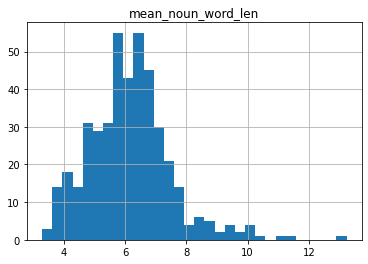

In [39]:
order_and_ratio_df.hist(column=['mean_noun_word_len'], bins=30)

array([[<AxesSubplot:title={'center':'mean_adj_word_len'}>]], dtype=object)

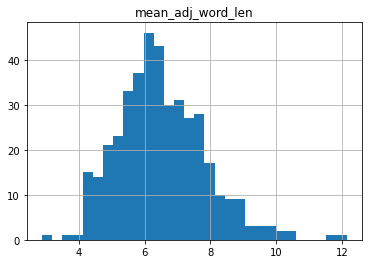

In [40]:
order_and_ratio_df.hist(column=['mean_adj_word_len'], bins=30)

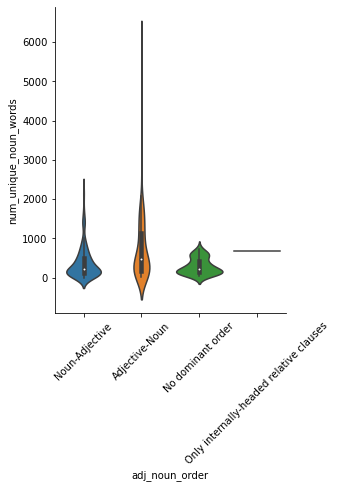

In [41]:
ax = sns.catplot(x='adj_noun_order', y='num_unique_noun_words', data=order_and_ratio_df, kind='violin')
plt.xticks(rotation=45)
plt.show()

In [42]:
order_and_ratio_df.groupby('SOV_order')['num_unique_noun_words'].mean()

SOV_order
No dominant order    374.895833
OSV                   17.000000
OVS                  301.500000
SOV                  446.385650
SVO                  613.200000
VOS                  329.272727
VSO                  451.076923
Name: num_unique_noun_words, dtype: float64

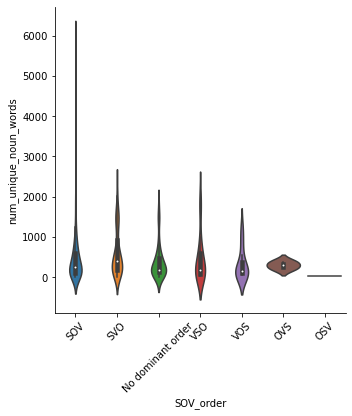

In [43]:
ax = sns.catplot(x='SOV_order', y='num_unique_noun_words', data=order_and_ratio_df, kind='violin')
plt.xticks(rotation=45)
plt.show()

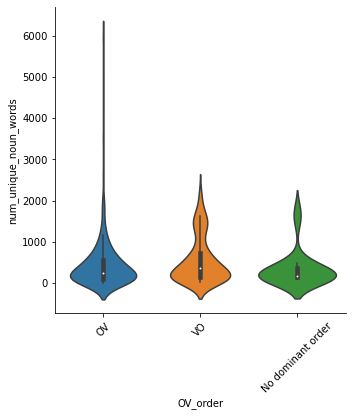

In [44]:
ax = sns.catplot(x='OV_order', y='num_unique_noun_words', data=order_and_ratio_df, kind='violin')
plt.xticks(rotation=45)
plt.show()

In [45]:
order_and_ratio_df.groupby('OV_order')['num_unique_noun_words'].mean()

OV_order
No dominant order    346.304348
OV                   439.703863
VO                   554.127778
Name: num_unique_noun_words, dtype: float64

In [48]:
order_and_ratio_df['OV_order'].value_counts()

OV                   233
VO                   180
No dominant order     23
Name: OV_order, dtype: int64

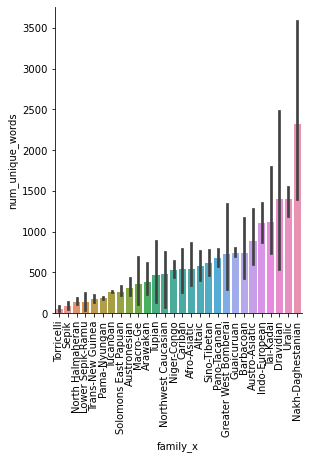

In [120]:
order_and_ratio_df['num_unique_words'] = order_and_ratio_df['num_unique_noun_words'] + order_and_ratio_df['num_unique_adj_words'] 
order = list(filtered_df.groupby('family_x')['num_unique_words'].mean().sort_values().index)
langs = order_and_ratio_df['family_x'].value_counts().index.tolist()
counts = order_and_ratio_df['family_x'].value_counts().tolist()

langs_to_keep = []
for i in range(len(langs)):
    if counts[i] > 2:
        langs_to_keep.append(langs[i])

keep_indices = order_and_ratio_df['family_x'].isin(langs_to_keep)
filtered_df = order_and_ratio_df[keep_indices]
ax = sns.catplot(x='family_x', y='num_unique_words', data=filtered_df, kind='bar', order=order)
plt.xticks(rotation=90)
plt.show()

In [103]:
num_langs = len(langs_to_keep)
ones_counts = [0] * num_langs
twos_counts = [0] * num_langs
threes_counts = [0] * num_langs

langs_list = list(filtered_df['family_x'])
orders_list = list(filtered_df['OV_order_coded'])

for i in range(len(langs_list)):
    
    lang = langs_list[i]
    index = langs_to_keep.index(lang)
    
    order = orders_list[i]
    if order == 1:
        ones_counts[index] += 1
    elif order == 2:
        twos_counts[index] += 1
    elif order == 3:
        threes_counts[index] += 1

In [109]:
dic = {'language_family': langs_to_keep,
      'OV': ones_counts,
      'VO': twos_counts,
      'no pref': threes_counts}
stacked_bar_df = pd.DataFrame(dic)
stacked_bar_df

,language_family,OV,VO,no pref
0,Austronesian,4,54,2
1,Indo-European,15,30,5
2,Trans-New Guinea,45,0,0
3,Pama-Nyungan,14,6,11
4,Sino-Tibetan,28,1,0
5,Niger-Congo,0,21,0
6,Afro-Asiatic,1,15,0
7,Uralic,6,6,0
8,Nakh-Daghestanian,11,0,0
9,Altaic,10,0,0


<AxesSubplot:xlabel='language_family'>

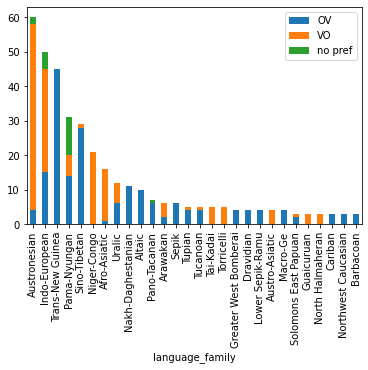

In [111]:
stacked_bar_df.plot(x='language_family', kind='bar', stacked=True)

In [108]:
filtered_df[filtered_df['family_x'] == 'North Halmaheran']['OV_order'].value_counts()

VO    3
Name: OV_order, dtype: int64